# Overview Data

**Drug Classification**

This database contains information about certain drug types

Data diunduh dari Kaggle (https://www.kaggle.com/prathamtripathi/drug-classification)

### License
<a href="https://creativecommons.org/publicdomain/zero/1.0/">CC0: Public Domain</a>

### Usability : 10.0
Easy to understand and includes essential metadata

- [x] Subtitle
- [x] Tags
- [x] Overview description
- [x] Cover image

Rich, machine readable file formats and metadata
- [x] File descriptions
- [x] Column descriptions
- [x] License specified
- [x] Acceptable file formats used

Assurances the dataset is maintained
- [x] Provenance is specified
- [x] Update frequency is specified
- [x] Has a public kernel or task


### Context

Since as a beginner in machine learning it would be a great opportunity to try some techniques to predict the outcome of the drugs that might be accurate for the patient.

### Content

The target feature is
Drug type
The feature sets are:
Age
Sex
Blood Pressure Levels (BP)
Cholesterol Levels
Na to Potassium Ration

### Inspiration

The main problem here in not just the feature sets and target sets but also the approach that is taken in solving these types of problems as a beginner. So best of luck.

### Expected Submission
The solution should contain a well-made machine learning model with high confidence in predicting the drug type (A, B,C,D) that should be given to a particular patient based on their characteristics and which drug type will suit them best.

### Evaluation
A better solution would be the the one with highest accuracy score, highest r2 score with a generalized supervised learning model.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Memuat file drug200.csv menjadi pandas dataframe
dataframe = pd.read_csv('drug200.csv')

In [3]:
# Menampilkan 5 baris pertama dari dataframe
dataframe.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [4]:
# Menampilkan informasi dari dataframe
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Mengubah Data Menjadi Numerik
Pada kolom Dtype terdapat banyak jenis data yang berbeda beda, yaitu int64, float64 dan object. Data dengan tipe objek ini merupakan categorical data, sehingga setelah ini harus dilakukan preprocessing untuk mengubah data menjadi numerik atau angka. Karena komputer hanya dapat membaca data yang berupa angka. Adapun caranya kita dapat menggunakan Encoder dari module Sklearn

In [5]:
dataframe_int = dataframe.copy()

In [6]:
from sklearn.preprocessing import LabelEncoder

In [7]:
# Membuat objek/instance yang bernama encoder
encoder = LabelEncoder()

In [8]:
categorical_data = ['Sex','BP','Cholesterol','Drug']

Mengubah data pada setiap kolom pada categorical data menjadi numerik/angka. `encoder.fit_transform(argumen)` akan me return data pada argumen yang telah diubah menjadi numerik. Kolom dataframe tersebut akan di replace data numerik yang telah di return

In [9]:
for kolom in categorical_data:
    dataframe_int[kolom] = encoder.fit_transform(dataframe[kolom])

In [10]:
# Sekarang data sudah berupa angka sepenuhnya
dataframe_int.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,0
1,47,1,1,0,13.093,3
2,47,1,1,0,10.114,3
3,28,0,2,0,7.798,4
4,61,0,1,0,18.043,0


In [11]:
dataframe_int.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    int32  
 2   BP           200 non-null    int32  
 3   Cholesterol  200 non-null    int32  
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    int32  
dtypes: float64(1), int32(4), int64(1)
memory usage: 6.4 KB


Mencari tahu berapa banyak kelas yang dimiliki oleh kategori data. Kita akan memprediksi pasien apakah pengonsumsi narkoba jenis Y,C,X,A atau B. Karena terdapat 5 kelas, maka permasalahan ini merupakan multiclass classification

In [12]:
for kolom in categorical_data:
    print(kolom,dataframe_int[kolom].unique())

Sex [0 1]
BP [0 1 2]
Cholesterol [0 1]
Drug [0 3 4 1 2]


In [13]:
for kolom in categorical_data:
    print(kolom,dataframe[kolom].unique())

Sex ['F' 'M']
BP ['HIGH' 'LOW' 'NORMAL']
Cholesterol ['HIGH' 'NORMAL']
Drug ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


Sekarang, kita dapat menganalisa bahwa kelas digantikan oleh angka dan angka tersebut mewakili kelas masing masing. Contohnya pada kolom Sex terdapat dua kelas yaitu 0 dan 1. Dimana 0 mewakili F yaitu Female atau wanita dan 1 mewakili M yaitu Male atau Pria. Begitu juga dengan kolom Drug, terdapat 5 kelas yaitu 0,3,4,1 dan 2. Dimana 0 mewakili Y, 3 mewakili C, 4 mewakili X, 1 mewakili A, dan 2 mewakili B

# Analisis Matrix Korelasi

In [14]:
# Menampilkan matrix korelasi antar kolom
dataframe_int.corr()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
Age,1.000000,0.102027,0.054212,-0.068234,-0.063119,0.041856
Sex,0.102027,1.000000,-0.007814,-0.008811,-0.125008,0.018239
BP,0.054212,-0.007814,1.000000,-0.137552,-0.149312,0.419397
Cholesterol,-0.068234,-0.008811,-0.137552,1.000000,0.010000,0.048415
Na_to_K,-0.063119,-0.125008,-0.149312,0.010000,1.000000,-0.689051
Drug,0.041856,0.018239,0.419397,0.048415,-0.689051,1.000000


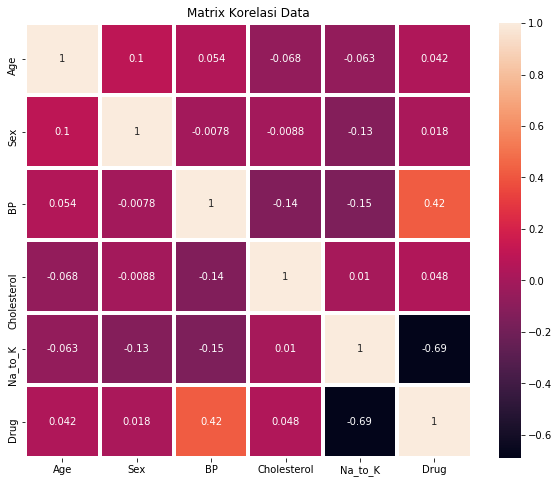

In [15]:
# Untuk membantu melakukan analisa akan lebih nyaman jika dilakukan visualisasi data
plt.figure(figsize=(10,8))
plt.title('Matrix Korelasi Data')
sns.heatmap(dataframe_int.corr(),annot=True,linewidths=3)
plt.show()

Disini terbaca bahwa kolom Na_to_K memiliki korelasi negatif yang besar sedangkan kolom dengan korelasi positif yang cukup besar hanya pada kolom BP yaitu Blood Pressure atau Tekanan Darah. Sedangkan kolom lain memiliki nilai korelasi yang dekat dengan nol. Artinya, kolom lain tidak terlalu berpengaruh dalam melakukan klasifikasi

# Distribusi Kelas

In [16]:
def distribusi():
    fig,axes = plt.subplots(nrows=2,ncols=3,figsize=(12,8))
    plt.suptitle('Distribusi',fontsize=24)
    
    def kolom_generator():
        for kolom in dataframe_int:
            yield kolom
    kolom = kolom_generator()

    for i in range(0,2):
        for j in range(0,3):
            k = next(kolom)
            dataframe_int[k].plot(kind='hist',ax=axes[i,j])
            axes[i,j].set_title(k)
    plt.show()

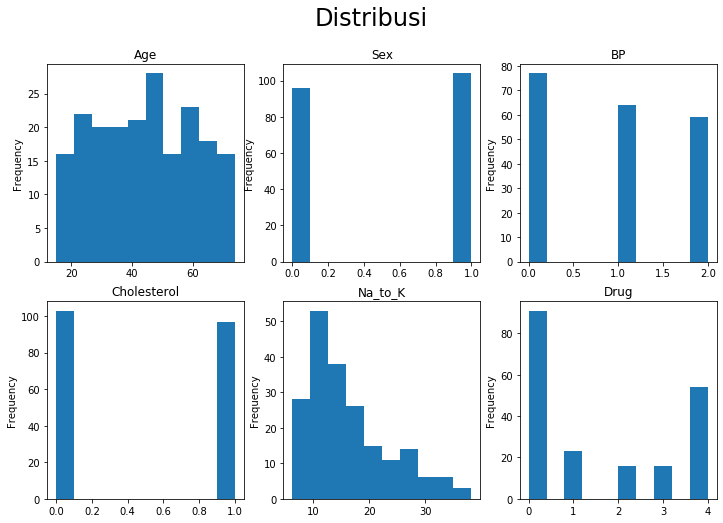

In [17]:
distribusi()

Kita dapat menganalisa pada visualisasi Drug dimana frekuensi setiap kelas tidak sama dan memiliki selisih yang jauh. Dimana kelas 0 dan 4 memiliki frekuensi diatas 60 semetara untuk kelas 1,2 dan 3 hanya memiliki frekuensi sekitar 20. Ini menyebabkan Machine Learning model yang akan kita buat setelahnya dapat memprediksi data pada frekuensi yang banyak dengan baik, sementara kesulitan meprediksi data dengan frekuensi sedikit. Karena model cukup berlatih pada kelas dengan frekuensi besar sementara program kurang berlatih pada frekuensi sedikit

# Memisahkan Data
Data harus dipisahkan dari target/label yang ingin diprediksi. Dalam kasus ini, data yang ingin diprediksi merupakan kolom Drug, maka kita pisahkan data menjadi dua. Setelah itu data harus dipisahkan menjadi data latihan dan data test

In [18]:
data = dataframe_int.drop('Drug',axis=1)
label = dataframe_int['Drug']

In [19]:
data.head()

,Age,Sex,BP,Cholesterol,Na_to_K
0,23,0,0,0,25.355
1,47,1,1,0,13.093
2,47,1,1,0,10.114
3,28,0,2,0,7.798
4,61,0,1,0,18.043


In [20]:
label.head()

0    0
1    3
2    3
3    4
4    0
Name: Drug, dtype: int32

In [21]:
# Kita dapat memisahkan data menjadi data latihan dan data tes dengan train_test_split yang terdapat pada module Sklearn
from sklearn.model_selection import train_test_split

In [22]:
x_train, x_test, y_train, y_test = train_test_split(data,label,test_size=0.2)

In [23]:
print(x_train.shape,y_train.shape)

(160, 5) (160,)


In [24]:
print(x_test.shape,y_test.shape)

(40, 5) (40,)


Sekarang data telah terpisah menjadi empat. Dimana data terdapat 160 data untuk latihan dan 40 data untuk test. Dimana jumlah 40 ini berasal dari argumen `test_size=0.2` dimana 40 merupakan 20% dari 200

# Membuat Machine Learning Model
Untuk menyelesaikan masalah klasifikasi atau classification maka kita dapat memilih beberapa pilihan. Dokumentasi dari sklearn https://scikit-learn.org/stable/tutorial/machine_learning_map/index.html

In [25]:
from sklearn.svm import SVC

In [26]:
# Membuat objek/instance dengan nama model
model = SVC(gamma='scale')

In [27]:
# Melatih model dengan data latihan
model.fit(x_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [28]:
# Membuat prediksi terhadap data tes
prediction = model.predict(x_test)

In [29]:
prediction

array([0, 0, 4, 4, 0, 0, 4, 0, 4, 0, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 0,
       4, 0, 0, 4, 4, 4, 0, 0, 0, 4, 0, 4, 0, 0, 4, 4, 0, 4])

In [30]:
# Menampilkan akurasi prediksi model
model.score(x_test,y_test)

0.65

# Evaluasi Model

In [31]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,r2_score

In [32]:
def display_conf(y_test,prediction):
    sns.heatmap(confusion_matrix(y_test,prediction),annot=True,linewidths=3,cbar=False)
    plt.title('Confusion Matrix')
    plt.ylabel('Actual')
    plt.xlabel('Prediction')
    plt.show()

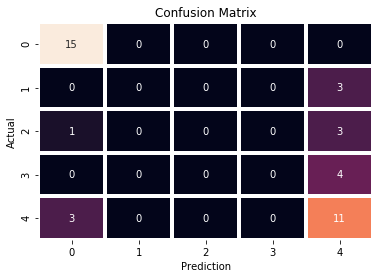

In [33]:
display_conf(y_test,prediction)

Karena label tidak memiliki jumlah kelas yang seimbang, maka kita tidak boleh menilai kualitas model hanya dari akurasinya saja. Namun harus mempertimbangkan recall dan f1 score. Pada confusion matrix terlihat bahwa model bekerja dengan buruk pada kelas 1,2 dan 3 karena data tersebut sangat sedikit jika dibandingkan kelas 0 dan 4

In [34]:
r2_score(y_test,prediction)

0.22748526123195778

In [35]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        15
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00         4
           4       0.52      0.79      0.63        14

    accuracy                           0.65        40
   macro avg       0.26      0.36      0.30        40
weighted avg       0.48      0.65      0.55        40



C:\Users\PHILIP\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Meningkatkan Model

In [36]:
from sklearn.model_selection import GridSearchCV

In [37]:
SVC(gamma='scale').get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'scale',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

Untuk mengatasi performa model yang buruk dikarenakan tidak seimbangnya frekuensi setiap kelas, maka kita dapat meningkatkan model dengan cara tuning hyperparameter. Pada estimator SVC terdapat banyak parameter yang dapat dituning, namun kita akan mentuning parameter C dan gamma. Dalam variabel param_grid. Selain dengan tuning hyperparameter, kita juga melakukan cross validation. Dimana kita akan menggunakan 5 fold pada argumen cv pada GridSearchCV()

In [38]:
param_grid = {'C':[0.01,0.1,1,10,100],
              'gamma':[100,10,1,0,1,0.01]}

In [39]:
best_model = GridSearchCV(SVC(),param_grid,cv=5,refit=True)

In [40]:
best_model.fit(x_train,y_train)

C:\Users\PHILIP\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [100, 10, 1, 0, 1, 0.01]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [41]:
# Model dengan parameter terbaik
best_model.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [42]:
# Membuat prediksi dengan model yang telah ditingkatkan
prediction = best_model.predict(x_test)

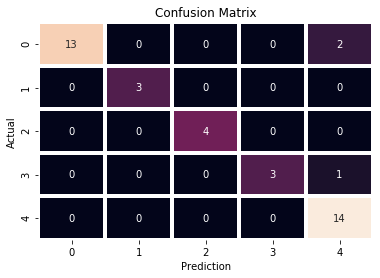

In [43]:
# Menampilkan confusion matrix pada prediksi yang baru
display_conf(y_test,prediction)

In [44]:
r2_score(y_test,prediction)

0.731652774954259

In [45]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

           0       1.00      0.87      0.93        15
           1       1.00      1.00      1.00         3
           2       1.00      1.00      1.00         4
           3       1.00      0.75      0.86         4
           4       0.82      1.00      0.90        14

    accuracy                           0.93        40
   macro avg       0.96      0.92      0.94        40
weighted avg       0.94      0.93      0.93        40



In [46]:
# Menampilkan data yang sebenarnya
encoder.inverse_transform(np.array(y_test))

array(['DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY', 'drugC',
       'DrugY', 'drugA', 'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY',
       'drugC', 'drugX', 'drugB', 'DrugY', 'drugA', 'DrugY', 'drugC',
       'DrugY', 'drugA', 'drugB', 'DrugY', 'drugC', 'drugX', 'drugX',
       'DrugY', 'DrugY', 'DrugY', 'drugB', 'drugX', 'drugX', 'drugX',
       'DrugY', 'drugB', 'drugX', 'drugX', 'drugX'], dtype=object)

In [47]:
# Menampilkan data yang diprediksi oleh model
encoder.inverse_transform(prediction)

array(['DrugY', 'DrugY', 'drugX', 'drugX', 'DrugY', 'DrugY', 'drugC',
       'DrugY', 'drugA', 'DrugY', 'drugX', 'drugX', 'drugX', 'DrugY',
       'drugC', 'drugX', 'drugB', 'DrugY', 'drugA', 'DrugY', 'drugC',
       'DrugY', 'drugA', 'drugB', 'drugX', 'drugX', 'drugX', 'drugX',
       'DrugY', 'DrugY', 'drugX', 'drugB', 'drugX', 'drugX', 'drugX',
       'DrugY', 'drugB', 'drugX', 'drugX', 'drugX'], dtype=object)

Kita dapat melihat bahwa model dapat memprediksi data dengan baik. Bahkan nyaris memprediksi semuanya dengan benar. Namun dalam pemrograman machine learning, tidak ada model yang dapat memiliki akurasi 100%, dan jika ada maka model itu overfiting. Setelah ini, jika Anda sudah cukup puas dengan peforma model, Anda dapat menggunakan model untuk bekerja. Untuk mensimulasikan bagaimana kita membuat prediksi dengan data baru yang kita input, maka dapat dilakukan sebagai berikut.

In [48]:
# Menampilkan format data
x_train.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K
143,74,1,0,1,15.436


In [49]:
def self_prediction():
    age = input('Age : ')
    sex = input('Sex : ')
    bp = input('BP : ')
    chol = input('Cholesterol : ')
    NatoK = input('Na_to_K : ')
    
    # data harus berbentuk (1,5) yaitu [[age,sex,bp,chol,NatoK]]
    print('\nPrediction')
    print('Patient consumed : ',encoder.inverse_transform(best_model.predict([[age,sex,bp,chol,NatoK]]))[0])

In [50]:
self_prediction()

Age : 26
Sex : 1
BP : 0
Cholesterol : 1
Na_to_K : 14.6

Prediction
Patient consumed :  drugA


# Menyimpan Model
Model dapat disimpan dengan `pickle.dump(model,nama_file)`. Model disimpan agar dapat digunakan di lain waktu dan dalam program/script yang berbeda tanpa harus membuat dan melatih model. Untuk memuat model yang telah disimpan tadi dapat dengan funsi `pickle.load(nama_file)` dan akan me-return objek yang di dump. Untuk mengkonfirmasi bahwa model telah dimuat, dapat dilakukan dengan menjalankan methodnya. Disini saya menjalankan `best_estimator_` dan berhasil, yang artinya model berhasil dimuat

In [51]:
import pickle

In [52]:
with open('AI_DrugClassifier.pkl','wb') as file:
    pickle.dump(best_model,file)

In [53]:
with open('AI_DrugClassifier.pkl','rb') as file:
    ml_model = pickle.load(file)

In [54]:
ml_model.best_estimator_

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

# Kaggle Submission

In [55]:
submission = pd.DataFrame()
submission['Actual'] = y_test
submission['Prediction'] = prediction

In [56]:
submission.head()

,Actual,Prediction
177,0,0
183,0,0
160,4,4
35,4,4
53,0,0


In [57]:
submission.to_csv('Submission.csv')

# Resolusi

Sekarang kita memiliki AI untuk membantu mendiagnosa pasien pengonsumsi narkoba. AI dapat memprediksi jenis narkoba yang dipakai pasien, sehingga model ini dapat digunakan untuk membantu rumah sakit atau badan rehabilitasi dalam mengkategorikan pasiennya. Model ini dapat digunakan sebagai cadangan, jika dokter sedang tidak tersedia atau menangani pasien lain.

Namun perlu diingat bahwa data di dunia nyata tidaklah sesimpel ini. Akan ada banyak data yang kosong dan tidak lengkap, serta untuk proses analisis dan preprocessing data pun memerlukan waktu dan tenaga tersendiri. Karena project ini hanya untuk latihan bagi pemula, maka tidak masalah. Anda hanya perlu terus berlatih dan pada dasarnya semua jenis ilmu yang ada di dunia ini dapat dipelajari.

# Tentang Saya
**Philip Purwoko** | Artificial Intelligence Enthusiast | Mahasiswa di Universitas Sebelas Maret — Surakarta | Indonesia

**Github** : https://github.com/PhilipPurwoko

**Medium** : https://medium.com/@philippurwoko

**Instagram** : https://instagram.com/philippurwoko